In [1]:
from test_multiple import all_expnames
import os
import pickle
import numpy as np

In [17]:
for expnames in all_expnames:
    # load metadata for experiments
    allowed_to_continue = True
    for i, expname in enumerate(expnames):
        try:
            metadata = {}
            with open('save/{}/metadata.txt'.format(expname), 'r') as f:
                for line in f:
                    # Strip white space and split by colon
                    key, value = line.strip().split(': ')
                    # Convert numerical values from strings
                    if value.replace('.', '', 1).isdigit():
                        if '.' in value:
                            value = float(value)
                        else:
                            value = int(value)
                    # Add to dictionary
                    metadata[key] = value
        except:
            print('No metadata found for experiment {}'.format(expnames[0]))
            allowed_to_continue = False
            continue
        if 'runtime' not in metadata:
            print('No runtime found for experiment {}'.format(expnames[0]))
            allowed_to_continue = False
            continue

    if allowed_to_continue:
        # check experiment shift
        if metadata['dataset'] == 'cifar10':

            if metadata['shift'] == 'label':
                try:
                    # load A_within.pkl and V_within.pkl from all three experiments in expnames
                    with open('save/{}/CIFAR_A_within.pkl'.format(expnames[0]), 'rb') as f:
                        A_within1 = pickle.load(f)
                    with open('save/{}/CIFAR_V_within.pkl'.format(expnames[0]), 'rb') as f:
                        V_within1 = pickle.load(f)
                    with open('save/{}/CIFAR_A_within.pkl'.format(expnames[1]), 'rb') as f:
                        A_within2 = pickle.load(f)
                    with open('save/{}/CIFAR_V_within.pkl'.format(expnames[1]), 'rb') as f:
                        V_within2 = pickle.load(f)
                    with open('save/{}/CIFAR_A_within.pkl'.format(expnames[2]), 'rb') as f:
                        A_within3 = pickle.load(f)
                    with open('save/{}/CIFAR_V_within.pkl'.format(expnames[2]), 'rb') as f:
                        V_within3 = pickle.load(f)
                except:
                    print('No CIFAR_A_within.pkl or CIFAR_V_within.pkl found for experiment {}'.format(expnames[0]))
                    continue

                all_accs1 = np.concatenate((A_within1, V_within1))
                all_accs2 = np.concatenate((A_within2, V_within2))
                all_accs3 = np.concatenate((A_within3, V_within3))

                mins = [np.min(all_accs1), np.min(all_accs2), np.min(all_accs3)]
                maxs = [np.max(all_accs1), np.max(all_accs2), np.max(all_accs3)]
                stds = [np.std(all_accs1), np.std(all_accs2), np.std(all_accs3)]

                experiment_name = ''
                # if name contains '5epochs', set the add '5epochs' to the experiment name
                if '5epochs' in expnames[0]:
                    experiment_name = '5epochs'
                if '10epochs' in expnames[0]:
                    experiment_name = '10epochs'
                # expermiment name is expnames[0] but remove everything after 'seed' and remove 'seed' from the name
                experiment_name += expnames[0].split('seed')[0][:-1]

                # dump to pickle file test_accuracies/experiment_name.pkl
                with open('acc_distributions/{}.pkl'.format(experiment_name), 'wb') as f:
                    pickle.dump([mins, maxs, stds], f)
            
            elif metadata['shift'] == '5_clusters':
                try:
                    # load CIFAR_acc_matrix.pkl from all three experiments in expnames
                    with open('save/{}/CIFAR_acc_matrix.pkl'.format(expnames[0]), 'rb') as f:
                        CIFAR_acc_matrix1 = pickle.load(f)
                    with open('save/{}/CIFAR_acc_matrix.pkl'.format(expnames[1]), 'rb') as f:
                        CIFAR_acc_matrix2 = pickle.load(f)
                    with open('save/{}/CIFAR_acc_matrix.pkl'.format(expnames[2]), 'rb') as f:
                        CIFAR_acc_matrix3 = pickle.load(f)
                except:
                    print('No CIFAR_acc_matrix.pkl found for experiment {}'.format(expnames[0]))
                    continue

                all_accs1 = []
                for i in range(5):
                    for client_idx in range(20):
                        all_accs1.append(CIFAR_acc_matrix1[i,i,client_idx])

                all_accs2 = []
                for i in range(5):
                    for client_idx in range(20):
                        all_accs2.append(CIFAR_acc_matrix2[i,i,client_idx])
                
                all_accs3 = []
                for i in range(5):
                    for client_idx in range(20):
                        all_accs3.append(CIFAR_acc_matrix3[i,i,client_idx])
                
                mins = [np.min(all_accs1), np.min(all_accs2), np.min(all_accs3)]
                maxs = [np.max(all_accs1), np.max(all_accs2), np.max(all_accs3)]
                stds = [np.std(all_accs1), np.std(all_accs2), np.std(all_accs3)]

                # expermiment name is expnames[0] but remove everything after 'seed' and remove 'seed' from the name
                experiment_name = expnames[0].split('seed')[0][:-1]

                # dump to pickle file acc_distributions/experiment_name.pkl
                with open('acc_distributions/{}.pkl'.format(experiment_name), 'wb') as f:
                    pickle.dump([mins, maxs, stds], f)

        elif metadata['dataset'] == 'fashion_mnist':
            try:
                # load fashion_MNIST_acc_matrix.pkl from all three experiments in expnames
                with open('save/{}/fashion_MNIST_acc_matrix.pkl'.format(expnames[0]), 'rb') as f:
                    fashion_MNIST_acc_matrix1 = pickle.load(f)
                with open('save/{}/fashion_MNIST_acc_matrix.pkl'.format(expnames[1]), 'rb') as f:
                    fashion_MNIST_acc_matrix2 = pickle.load(f)
                with open('save/{}/fashion_MNIST_acc_matrix.pkl'.format(expnames[2]), 'rb') as f:
                    fashion_MNIST_acc_matrix3 = pickle.load(f)
            except:
                print('No fashion_MNIST_acc_matrix.pkl found for experiment {}'.format(expnames[0]))
                continue

            # make all fashion_MNIST_acc_matrix numpy arrays
            fashion_MNIST_acc_matrix1 = np.array(fashion_MNIST_acc_matrix1)
            fashion_MNIST_acc_matrix2 = np.array(fashion_MNIST_acc_matrix2)
            fashion_MNIST_acc_matrix3 = np.array(fashion_MNIST_acc_matrix3)

            mins = [np.min(fashion_MNIST_acc_matrix1), np.min(fashion_MNIST_acc_matrix2), np.min(fashion_MNIST_acc_matrix3)]
            maxs = [np.max(fashion_MNIST_acc_matrix1), np.max(fashion_MNIST_acc_matrix2), np.max(fashion_MNIST_acc_matrix3)]
            stds = [np.std(fashion_MNIST_acc_matrix1), np.std(fashion_MNIST_acc_matrix2), np.std(fashion_MNIST_acc_matrix3)]

            # expermiment name is expnames[0] but remove everything after 'seed' and remove 'seed' from the name
            experiment_name = expnames[0].split('seed')[0][:-1]
            
            # dump to pickle file acc_distributions/experiment_name.pkl
            with open('acc_distributions/{}.pkl'.format(experiment_name), 'wb') as f:
                pickle.dump([mins, maxs, stds], f)

        elif metadata['dataset'] == 'cifar100':
            try:
                # load CIFAR100_acc_matrix.pkl from all three experiments in expnames
                with open('save/{}/CIFAR100_acc_matrix.pkl'.format(expnames[0]), 'rb') as f:
                    CIFAR100_acc_matrix1 = pickle.load(f)
                with open('save/{}/CIFAR100_acc_matrix.pkl'.format(expnames[1]), 'rb') as f:
                    CIFAR100_acc_matrix2 = pickle.load(f)
                with open('save/{}/CIFAR100_acc_matrix.pkl'.format(expnames[2]), 'rb') as f:
                    CIFAR100_acc_matrix3 = pickle.load(f)
            except:
                print('No CIFAR100_acc_matrix.pkl found for experiment {}'.format(expnames[0]))
                continue

            # make all CIFAR100_acc_matrix numpy arrays
            CIFAR100_acc_matrix1 = np.array(CIFAR100_acc_matrix1)
            CIFAR100_acc_matrix2 = np.array(CIFAR100_acc_matrix2)
            CIFAR100_acc_matrix3 = np.array(CIFAR100_acc_matrix3)

            mins = [np.min(CIFAR100_acc_matrix1), np.min(CIFAR100_acc_matrix2), np.min(CIFAR100_acc_matrix3)]
            maxs = [np.max(CIFAR100_acc_matrix1), np.max(CIFAR100_acc_matrix2), np.max(CIFAR100_acc_matrix3)]
            stds = [np.std(CIFAR100_acc_matrix1), np.std(CIFAR100_acc_matrix2), np.std(CIFAR100_acc_matrix3)]

            # expermiment name is expnames[0] but remove everything after 'seed' and remove 'seed' from the name
            experiment_name = expnames[0].split('seed')[0][:-1]

            # dump to pickle file acc_distributions/experiment_name.pkl
            with open('acc_distributions/{}.pkl'.format(experiment_name), 'wb') as f:
                pickle.dump([mins, maxs, stds], f)
                





No metadata found for experiment CIFAR_label_DAC_priorweight_invloss_tau_5_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_invloss_tau_5_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_invloss_tau_5_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_l2_tau_5_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_l2_tau_5_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_l2_tau_5_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_cosine_tau_200_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_cosine_tau_200_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_cosine_tau_200_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_cosine_origin_tau_200_seed_1_fixed
No metadata found for experiment CIFAR_label_DAC_priorweight_cosine_origin_tau_200_seed_1_fixed
No metadata found for experi

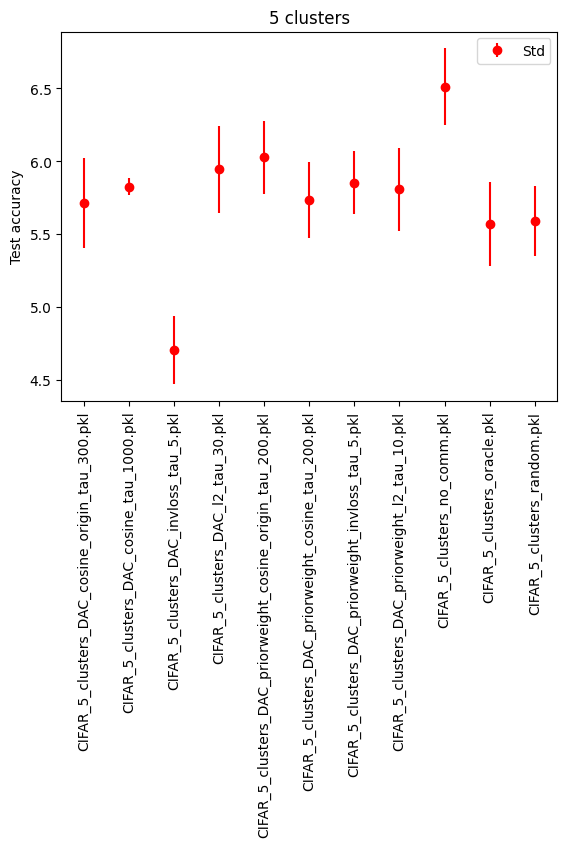

In [16]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

# Define specific colors for each label
color_min = 'blue'
color_max = 'green'
color_std = 'red'

# Initialize a dictionary to hold the data
data = {}

# Collect all data first
for filename in os.listdir('acc_distributions/'):
    if '5_clusters' in filename:
        with open(f'acc_distributions/{filename}', 'rb') as f:
            mins, maxs, stds = pickle.load(f)
            data[filename] = (np.mean(mins), np.std(mins), np.mean(maxs), np.std(maxs), np.mean(stds), np.std(stds))

# Define the order of the filenames or customize it
# For example, sorted alphabetically, or define a custom order:
sorted_filenames = sorted(data.keys(), key=lambda x: x)  # Simple alphabetical sort

# Now plot the data in this sorted order
plt.figure()
for filename in sorted_filenames:
    mean_min, std_min, mean_max, std_max, mean_std, std_std = data[filename]
    #plt.errorbar(filename, mean_min, yerr=std_min, fmt='o', color=color_min, label='Min' if 'Min' not in plt.gca().get_legend_handles_labels()[1] else "")
    #plt.errorbar(filename, mean_max, yerr=std_max, fmt='o', color=color_max, label='Max' if 'Max' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.errorbar(filename, mean_std, yerr=std_std, fmt='o', color=color_std, label='Std' if 'Std' not in plt.gca().get_legend_handles_labels()[1] else "")

# Set the custom order of x-ticks
plt.xticks(range(len(sorted_filenames)), sorted_filenames, rotation=90)
plt.title('5 clusters')
# add y label
plt.ylabel('Test accuracy')
plt.legend()
plt.show()


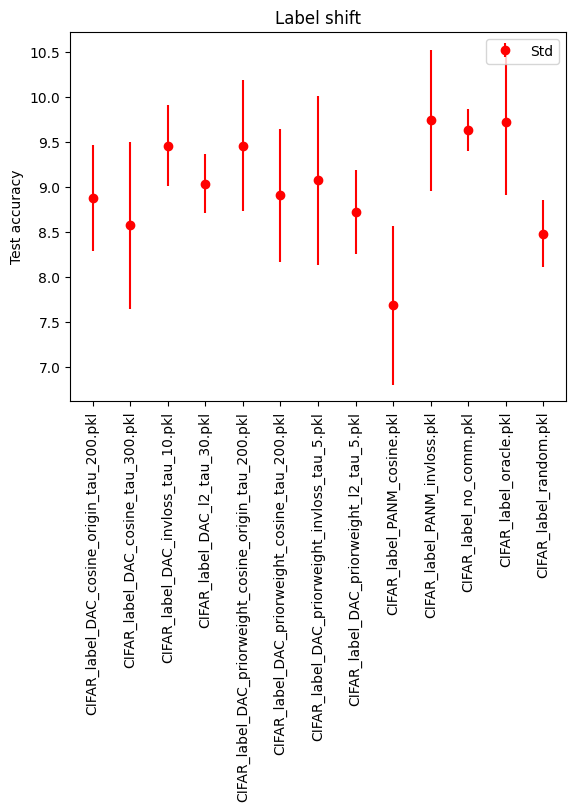

In [15]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np

# Define specific colors for each label
color_min = 'blue'
color_max = 'green'
color_std = 'red'

# Initialize a dictionary to hold the data
data = {}

# Collect all data first
for filename in os.listdir('acc_distributions/'):
    if 'label' in filename and '5epochs' not in filename and '10epochs' not in filename:
        with open(f'acc_distributions/{filename}', 'rb') as f:
            mins, maxs, stds = pickle.load(f)
            data[filename] = (np.mean(mins), np.std(mins), np.mean(maxs), np.std(maxs), np.mean(stds), np.std(stds))

# Define the order of the filenames or customize it
# For example, sorted alphabetically, or define a custom order:
sorted_filenames = sorted(data.keys(), key=lambda x: x)  # Simple alphabetical sort

# Now plot the data in this sorted order
plt.figure()
for filename in sorted_filenames:
    mean_min, std_min, mean_max, std_max, mean_std, std_std = data[filename]
    plt.errorbar(filename, mean_min, yerr=std_min, fmt='o', color=color_min, label='Min' if 'Min' not in plt.gca().get_legend_handles_labels()[1] else "")
    #plt.errorbar(filename, mean_max, yerr=std_max, fmt='o', color=color_max, label='Max' if 'Max' not in plt.gca().get_legend_handles_labels()[1] else "")
    #plt.errorbar(filename, mean_std, yerr=std_std, fmt='o', color=color_std, label='Std' if 'Std' not in plt.gca().get_legend_handles_labels()[1] else "")

# Set the custom order of x-ticks
plt.xticks(range(len(sorted_filenames)), sorted_filenames, rotation=90)
plt.title('Label shift')
# add y label
plt.ylabel('Test accuracy')
plt.legend()

plt.show()
